In [16]:
import pandas as pd
import matplotlib.pyplot as plt

subject_feature_df = pd.read_csv("sae_bio_subject_related_clamping_results.csv")
subject_feature_df = subject_feature_df[subject_feature_df["clamp_value"] == 0]
sparsity_feature_df = pd.read_csv("sae_bio_sparsity_clamping_results.csv")
sparsity_feature_df = sparsity_feature_df[sparsity_feature_df["clamp_value"] == 0]

In [22]:
subject_feature_df = subject_feature_df[subject_feature_df["n_features"] <= 8000]
sparsity_feature_df = sparsity_feature_df[sparsity_feature_df["n_features"] <= 8000]

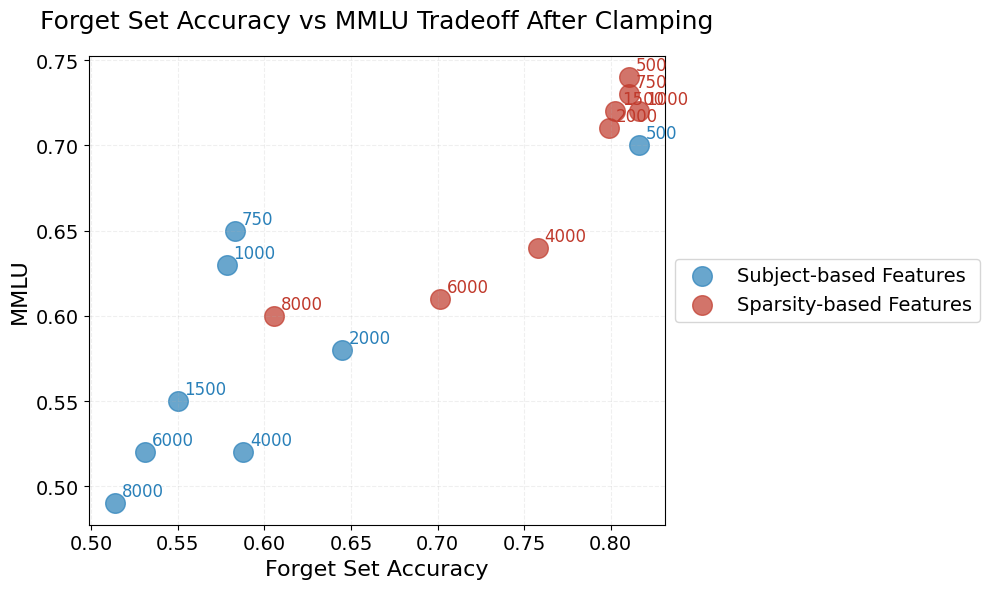

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for different dataframes with more muted, professional tones
colors = {'Subject Features': '#2980b9', 'Sparsity Features': '#c0392b'}
names = {'Subject Features': 'Subject-based Features', 'Sparsity Features': 'Sparsity-based Features'}

# Plot each point and add annotations
for df, label in [(subject_feature_df, 'Subject Features'), 
                  (sparsity_feature_df, 'Sparsity Features')]:
    # Plot points
    ax.scatter(df['rel_prob_with_clamping'],
              df['mmlu_with_clamping'],
              c=colors[label],
              s=200,
              alpha=0.7,
              label=names[label])
    
    # Add n_features annotations
    for idx, row in df.iterrows():
        ax.annotate(f'{int(row["n_features"])}',
                   (row['rel_prob_with_clamping'], row['mmlu_with_clamping']),
                   xytext=(5, 5),  # 5 points offset
                   textcoords='offset points',
                   fontsize=12,
                   color=colors[label])

# Customize the plot
ax.set_xlabel('Forget Set Accuracy', fontsize=16)
ax.set_ylabel('MMLU', fontsize=16)
ax.set_title('Forget Set Accuracy vs MMLU Tradeoff After Clamping', fontsize=18, pad=20)

# Add grid with lower opacity
ax.grid(True, alpha=0.2, linestyle='--')

# Customize tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend with larger text
ax.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Show the plot
plt.show()